In [16]:
PATH = '/home/g056122/FeatExt_Data_Clustering/final_github/content_based_filtering'

In [2]:
DATAPATH = '/home/g056122/ISG_studienarbeit/Movielens_100K'

In [3]:
# import required libraries
import numpy as np
import pandas as pd
import datetime
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import pickle

In [4]:
# import movies data
dfmovies = pd.read_csv("/home/g056122/ISG_studienarbeit/Movielens_100K/u.item", sep='|', header=None, engine='python', encoding='latin-1')
dfmovies.columns = ['movieId', 'movietitle', 'releasedate', 'videoreleasedate','imdburl', 'unknown', 'action', 'adventure', 'animation','childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-Noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi','thriller', 'war', 'western']

In [5]:
# drop features of movies dataset
dfmovies = dfmovies.drop(['videoreleasedate', 'imdburl'], axis=1)

In [6]:
# transform features of movies dataset
dfmovies['releasedate'] = pd.to_datetime (dfmovies['releasedate'], format='%d-%b-%Y')
dfmovies['year']=dfmovies['releasedate'].dt.year

In [7]:
dfmovies.head()

,movieId,movietitle,releasedate,unknown,action,adventure,animation,childrens,comedy,crime,...,film-Noir,horror,musical,mystery,romance,sci-fi,thriller,war,western,year
0,1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),1995-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995.0


In [8]:
# drop features
dfmovies = dfmovies.drop(['movietitle', 'releasedate'], axis=1)

In [9]:
# encode features
n_dfmovies = pd.get_dummies(dfmovies, columns = ['year'])

In [10]:
n_dfmovies.head()

,movieId,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,...,year_1989.0,year_1990.0,year_1991.0,year_1992.0,year_1993.0,year_1994.0,year_1995.0,year_1996.0,year_1997.0,year_1998.0
0,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [11]:
n_dfmovies.describe()

,movieId,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,...,year_1989.0,year_1990.0,year_1991.0,year_1992.0,year_1993.0,year_1994.0,year_1995.0,year_1996.0,year_1997.0,year_1998.0
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,0.431034,...,0.008918,0.014269,0.01308,0.021998,0.074911,0.127229,0.130202,0.211058,0.170036,0.038644
std,485.695893,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,0.495368,...,0.094041,0.118632,0.11365,0.146719,0.263326,0.333329,0.336626,0.408181,0.375776,0.192803
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
categoryindex = list(range(1,91))

In [13]:
# Elbow curve to find optimal K
cost = []
K = range(1, 10)
for num_clusters in list(K):
    kprototype = KPrototypes(n_clusters=num_clusters, init = "Huang")
    kprototype.fit_predict(n_dfmovies, categorical = categoryindex)    
    cost.append(kprototype.cost_)

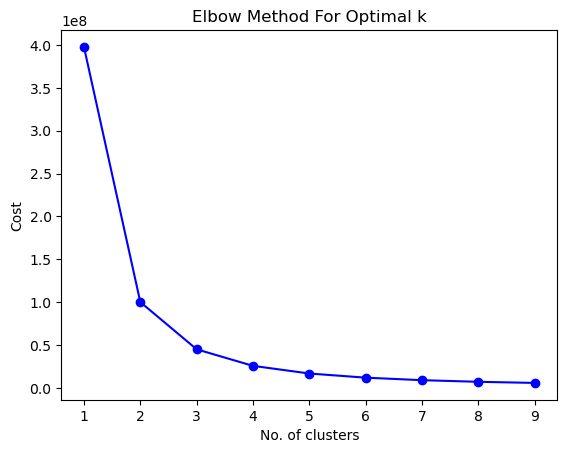

In [18]:
# plot elbow method
plt.plot(K, cost, 'bo-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.savefig('cont_categ_cluster.jpg')